# Master Data Analysis for Metropolitan City Metrics

In [2]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sqlalchemy import create_engine
from pymongo import MongoClient
from flask import Flask, render_template, request, jsonify
import plotly.express as px

### Loading Cleaned Data

After data was cleaned in a seperate notebook, it was loaded and read into this file. 

In [6]:
# Load the datasets from Chicago 
chicago_commute_csv = Path('data_files/chicago_data/chi_cleaned_csv/cleaned_chi_commute.csv')
chicago_unemployment_csv = Path('data_files/chicago_data/chi_cleaned_csv/cleaned_chi_employment.csv')
chicago_rent_csv = Path('data_files/chicago_data/chi_cleaned_csv/cleaned_chi_rent.csv')
chicago_income_csv = Path('data_files/chicago_data/chi_cleaned_csv/cleaned_chi_income.csv')
chicago_edu_csv = Path('data_files/chicago_data/chi_cleaned_csv/cleaned_chi_edu.csv')
chicago_age_csv = Path('data_files/chicago_data/chi_cleaned_csv/cleaned_chi_age.csv')
chicago_race_csv = Path('data_files/chicago_data/chi_cleaned_csv/cleaned_chi_race.csv')

# Read the csv files
chicago_commute_df = pd.read_csv(chicago_commute_csv)
chicago_unemployment_df = pd.read_csv(chicago_unemployment_csv)
chicago_rent_df = pd.read_csv(chicago_rent_csv)
chicago_income_df = pd.read_csv(chicago_income_csv)
chicago_edu_df = pd.read_csv(chicago_edu_csv)
chicago_age_df = pd.read_csv(chicago_age_csv)
chicago_race_df = pd.read_csv(chicago_race_csv)

In [7]:
# Load the datasets from Houston 
houston_commute_csv = Path('data_files/houston_data/houston_cleaned_csv/cleaned_hou_commute.csv')
houston_unemployment_csv = Path('data_files/houston_data/houston_cleaned_csv/cleaned_hou_unemployment.csv')
houston_rent_csv = Path('data_files/houston_data/houston_cleaned_csv/cleaned_hou_rent.csv')
houston_income_csv = Path('data_files/houston_data/houston_cleaned_csv/cleaned_hou_income.csv')
houston_edu_csv = Path('data_files/houston_data/houston_cleaned_csv/cleaned_hou_edu_level.csv')
houston_age_csv = Path('data_files/houston_data/houston_cleaned_csv/cleaned_hou_age.csv')
houston_race_csv = Path('data_files/houston_data/houston_cleaned_csv/cleaned_hou_race.csv')

# Read the csv files
houston_commute_df = pd.read_csv(houston_commute_csv)
houston_unemployment_df = pd.read_csv(houston_unemployment_csv)
houston_rent_df = pd.read_csv(houston_rent_csv)
houston_income_df = pd.read_csv(houston_income_csv)
houston_edu_df = pd.read_csv(houston_edu_csv)
houston_age_df = pd.read_csv(houston_age_csv)
houston_race_df = pd.read_csv(houston_race_csv)

In [8]:
# Load the datasets from New York
nyc_commute_csv = Path('data_files/ny_data/nyc_cleaned_data/cleaned_nyc_commute.csv')
nyc_unemployment_csv = Path('data_files/ny_data/nyc_cleaned_data/cleaned_nyc_unemployment.csv')
nyc_rent_csv = Path('data_files/ny_data/nyc_cleaned_data/cleaned_nyc_rent.csv')
nyc_income_csv = Path('data_files/ny_data/nyc_cleaned_data/cleaned_nyc_income.csv')
nyc_edu_csv = Path('data_files/ny_data/nyc_cleaned_data/cleaned_nyc_edu_level.csv')
nyc_age_csv = Path('data_files/ny_data/nyc_cleaned_data/cleaned_nyc_age.csv')
nyc_race_csv = Path('data_files/ny_data/nyc_cleaned_data/cleaned_nyc_race.csv')

# Read the csv files
nyc_commute_df = pd.read_csv(nyc_commute_csv)
nyc_unemployment_df = pd.read_csv(nyc_unemployment_csv)
nyc_rent_df = pd.read_csv(nyc_rent_csv)
nyc_income_df = pd.read_csv(nyc_income_csv)
nyc_edu_df = pd.read_csv(nyc_edu_csv)
nyc_age_df = pd.read_csv(nyc_age_csv)
nyc_race_df = pd.read_csv(nyc_race_csv)

In [9]:
# Load the datasets from Los Angeles
la_commute_csv = Path('data_files/los_angeles_data/la_cleaned_csv/cleaned_la_commute_time.csv')
la_unemployment_csv = Path('data_files/los_angeles_data/la_cleaned_csv/cleaned_la_unemployment_rate.csv')
la_rent_csv = Path('data_files/los_angeles_data/la_cleaned_csv/cleaned_la_housing_metrics.csv')
la_income_csv = Path('data_files/los_angeles_data/la_cleaned_csv/cleaned_la_med_household_income.csv')
la_edu_csv = Path('data_files/los_angeles_data/la_cleaned_csv/cleaned_la_edu_lvl.csv')
la_age_csv = Path('data_files/los_angeles_data/la_cleaned_csv/cleaned_la_age.csv')
la_race_csv = Path('data_files/los_angeles_data/la_cleaned_csv/clean')

# Read csv files
la_commute_df = pd.read_csv(la_commute_csv)
la_unemployment_df = pd.read_csv(la_unemployment_csv)
la_rent_df = pd.read_csv(la_rent_csv)
la_income_df = pd.read_csv(la_income_csv)
la_edu_df = pd.read_csv(la_edu_csv)
la_age_df = pd.read_csv(la_age_csv)
la_race_df = pd.read_csv(la_race_csv)

FileNotFoundError: [Errno 2] No such file or directory: 'data_files/los_angeles_data/la_cleaned_csv/cleaned_la_age.csv'

In [ ]:
# Load the datasets from Phoenix
phx_commute_csv = Path('data_files/phoenix_data/phx_cleaned_csv/cleaned_phx_commute.csv')
phx_unemployment_csv = Path('data_files/phoenix_data/phx_cleaned_csv/cleaned_phx_unemployment.csv')
phx_rent_csv = Path('data_files/phoenix_data/phx_cleaned_csv/cleaned_phx_rent.csv')
phx_income_csv = Path('data_files/phoenix_data/phx_cleaned_csv/cleaned_phx_income.csv')
phx_edu_csv = Path('data_files/phoenix_data/phx_cleaned_csv/cleaned_phx_edu_level.csv')
phx_age_csv = Path('data_files/phoenix_data/phx_cleaned_csv/cleaned_phx_age.csv')
phx_race_csv = Path('data_files/phoenix_data/phx_cleaned_csv/cleaned_phx_race.csv')

# Read csv files into pandas DataFrames
phx_commute_df = pd.read_csv(phx_commute_csv)
phx_unemployment_df = pd.read_csv(phx_unemployment_csv)
phx_rent_df = pd.read_csv(phx_rent_csv)
phx_income_df = pd.read_csv(phx_income_csv)
phx_edu_df = pd.read_csv(phx_edu_csv)
phx_age_df = pd.read_csv(phx_age_csv)
phx_race_df = pd.read_csv(phx_race_csv)

#### Merging DataFrames

In [5]:
# Merge the datasets for each city into a single DataFrame for each metric
combined_commute_df = pd.concat([chicago_commute_df, houston_commute_df, la_commute_df, phx_commute_df], ignore_index=True)
combined_unemployment_df = pd.concat([chicago_unemployment_df, houston_unemployment_df, nyc_unemployment_df, la_unemployment_df, phx_unemployment_df], ignore_index=True)
combined_rent_df = pd.concat([chicago_rent_df, houston_rent_df, nyc_rent_df, la_rent_df, phx_rent_df], ignore_index=True)
combined_income_df = pd.concat([chicago_income_df, houston_income_df, la_income_df, phx_income_df], ignore_index=True)
combined_edu_df = pd.concat([chicago_edu_df, houston_edu_df, nyc_edu_df, la_edu_df, phx_edu_df], ignore_index=True)
combined_age_df = pd.concat([chicago_age_df, houston_age_df, nyc_age_df, la_age_df, phx_age_df], ignore_index=True)
combined_race_df = pd.concat([chicago_race_df, houston_race_df, la_race_df, nyc_race_df, phx_race_df], ignore_index=True)

NameError: name 'chicago_commute_df' is not defined

In [ ]:
# Save combined DataFrames to new CSV files
combined_commute_df.to_csv('cleaned_data/combined_commute.csv', index=False)
combined_unemployment_df.to_csv('cleaned_data/combined_unemployment.csv', index=False)
combined_rent_df.to_csv('cleaned_data/combined_rent.csv', index=False)
combined_income_df.to_csv('cleaned_data/combined_income.csv', index=False)
combined_edu_df.to_csv('cleaned_data/combined_education.csv', index=False)
combined_age_df.to_csv('cleaned_data/combined_age.csv', index=False)
combined_race_df.to_csv('cleaned_data/combined_race.csv', index=False) 

Here a Flask application was created 

In [ ]:
# Create a Flask application
app = Flask(__name__)

## Population Density Overview

##### What is Population Density? 
**insert definition

This visualization shows the ten cities that we are analyzing as a group and trying to determined which city has the largest population along with several factors that contribute to the growth of the city. Later we will review four different metrics that help categorize how successful a city is in the long run. 

In [ ]:
## Map with density bubbles to see the differnt cities 

In [ ]:
## Click on a city it shows you the different metrics on it 

## Economic Metric 

**Measuring**: Median Household Income, Unemployment Rate

Using the previously cleaned data that was pulled from the 2020 Census Database for the ten major cities. The two metrics listed were used to analyze and visualize directionality. The questions we wanted to ask were: 
* "If a city is larger, will there be a higher househould income and/or unemployment rate? 
* "What factors go into making a city fit within this criteria of having a strong economic stand compared to other cities?" 

** directionality 
The larger the city the higher 
- house hold income
- unemployment rate
- poverty rate 

**The larger the city the more skewed the data (put all the data in one visualization )
- household income (maried vs unmarried)

In [ ]:
# Scatter plot for Median Household Income vs Unemployment Rate 

## Demographic Metric 

**Measuring**: ACS Median Age, Racial Metrics, and Education Level

Using the previously cleaned data that was pulled from the 2020 Census Database and the American Community Survey (ACS) by the U.S. Census Bureau, we used the three metrics to visualize and analyze the ten cities. The questions that we wanted to ask and analyze are: 
* "How does population density and age vary within geographic region, and does the size of the city factor into this?" 
* "Will larger cities with more population have a higher education level (i.e. individuals with a degree higher than a High School Diploma)?
* "What does the population tell you about age and demographics within a larger city?" 

## Housing Metric

**Measuring**: Median Rent

Using the previously cleaned data that was pulled from the 2020 Census Database and the American Community Survey (ACS) by the U.S. Census Bureau, we used the one metric to visualize and analyze the cities. The questions that we wanted to ask and analyze are: 
* "What is the varying degree of rent cost in larger cities? Look at NY vs a more spread out city with maybe even a larger population? Is there a difference in rent?" 
    
    Note: with this, will want to maybe compare and contrast our top cities (or jsut take NY) and see why rent is so much? Is it desirability? I'm thinking like Houston is a broad/spread out city with lots of people but is rent similar to NYC? What about Chicago? Is it location? 

* "What is the age range of homeownership and does this vary in larger cities vs. smaller?" 

## Quality of Life

**Measuring**: Commute Time & Air Quality Index

Using the previously cleaned data that was pulled from the 2020 Census Database from the American Community Survey (ACS) by the U.S. Census Bureau, and the EPA Air Quality Index report in 2020. We used the two metrics to visualize and analyze the ten cities. The questions that we wanted to ask and analyze are: 
* "How does Air quality affect quality of living. Is it sustainable?"
* "Are more people intersted in moving to more "walkable" cities? What does the commute time in various cities tell us about the transit system?" 
    NOTE: here I know there is an article out there about how gen Z and millenials want to move to walkable places and how more smaller cities are trying to plan this out. I.E. I know that Raleigh is not a very walkable city and most people drive everywhere vs new york where everyone walks and even chicago where its a mix of driving and walking (personal experience there's some broughs of chicago where you cannot walk too and its very hard to get there unless you drive. Metro is impossible)

In [4]:
# Melt the DataFrame to have a long format if necessary
commute_times_long_df = pd.melt(
    combined_commute_df, 
    id_vars=['City'], 
    value_vars=['Commute Time Car', 'Commute Time Public Transport', 'Commute Time Walk', 'Commute Time Bike'], 
    var_name='Commute Mode', 
    value_name='Commute Time'
)

# Convert Commute Time to numeric if necessary
commute_times_long_df['Commute Time'] = pd.to_numeric(commute_times_long_df['Commute Time'], errors='coerce')

NameError: name 'combined_commute_df' is not defined

##### Air Quality (EPA)

A dataset was found on the [EPA website](https://aqs.epa.gov/aqsweb/airdata/download_files.html), highlighting each state and country within the state for AQI (Air Quality Index). Data was cleaned and only cities that were needed were filtered out, respectively. 


In [13]:
# File to load
aqi_data_csv = Path("data_files/annual_aqi_2020.csv")

# Read the AQI data into a pandas DataFrame
aqi_data_df = pd.read_csv(aqi_data_csv)
aqi_data_df.head()


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2020,269,223,46,0,0,0,0,74,54,38,0,0,178,91,0
1,Alabama,Clay,2020,105,83,22,0,0,0,0,88,56,34,0,0,0,105,0
2,Alabama,DeKalb,2020,364,332,32,0,0,0,0,91,49,37,0,0,309,55,0
3,Alabama,Elmore,2020,197,197,0,0,0,0,0,47,41,31,0,0,197,0,0
4,Alabama,Etowah,2020,276,239,37,0,0,0,0,93,53,36,0,0,191,85,0


In [ ]:
# List of counties to filter
counties = [
    "Cook", "Harris", "New York", 
    "Los Angeles", "Philadelphia", 
    "Maricopa", "Bexar", "Dallas", 
    "San Diego", "Santa Clara"
]

# Filter the DataFrame for the specified counties
filtered_aqi_df = aqi_data_df[aqi_data_df['County'].isin(counties)]

# Display the filtered DataFrame
filtered_aqi_df.reset_index(drop=True, inplace=True)
filtered_aqi_df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Arizona,Maricopa,2020,366,11,154,60,66,75,0,282,216,112,0,0,271,63,32
1,California,Los Angeles,2020,366,35,194,77,43,17,0,250,166,85,0,9,180,175,2
2,California,San Diego,2020,366,33,284,35,14,0,0,192,108,74,0,0,100,263,3
3,California,Santa Clara,2020,366,174,172,11,9,0,0,198,81,52,0,3,107,256,0
4,Illinois,Cook,2020,366,86,260,16,4,0,0,164,84,58,0,5,73,263,25
5,Minnesota,Cook,2020,345,340,5,0,0,0,0,59,28,13,0,0,0,345,0
6,New York,New York,2020,366,258,107,1,0,0,0,108,61,40,2,0,174,190,0
7,Pennsylvania,Philadelphia,2020,366,212,149,5,0,0,0,119,63,47,0,17,111,238,0
8,Texas,Bexar,2020,366,119,237,9,1,0,0,160,80,55,0,0,110,255,1
9,Texas,Dallas,2020,366,218,142,6,0,0,0,135,69,46,0,17,161,187,1


/var/folders/mp/thd95nvx4mx5cz9q4kvwptn40000gn/T/ipykernel_2797/72362267.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='County', y='Good Days', data=filtered_aqi_df, palette='viridis')


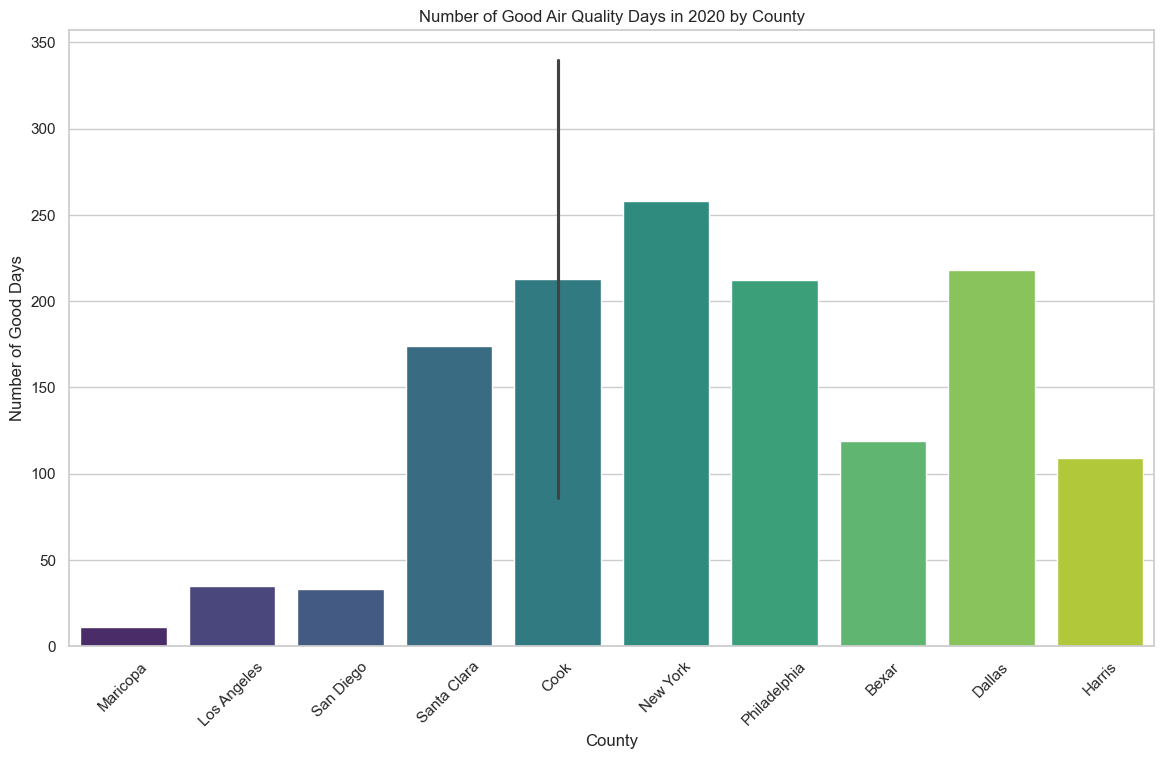

In [26]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for the number of good days in each county
sns.barplot(x='County', y='Good Days', data=filtered_aqi_df, palette='viridis')

# Set the title and labels
plt.title('Number of Good Air Quality Days in 2020 by County')
plt.xlabel('County')
plt.ylabel('Number of Good Days')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

/var/folders/mp/thd95nvx4mx5cz9q4kvwptn40000gn/T/ipykernel_2797/1818850566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_aqi_df['Bad Days'] = filtered_aqi_df['Unhealthy Days'] + filtered_aqi_df['Very Unhealthy Days'] + filtered_aqi_df['Hazardous Days']
/var/folders/mp/thd95nvx4mx5cz9q4kvwptn40000gn/T/ipykernel_2797/1818850566.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='County', y='Bad Days', data=filtered_aqi_df, palette='viridis')


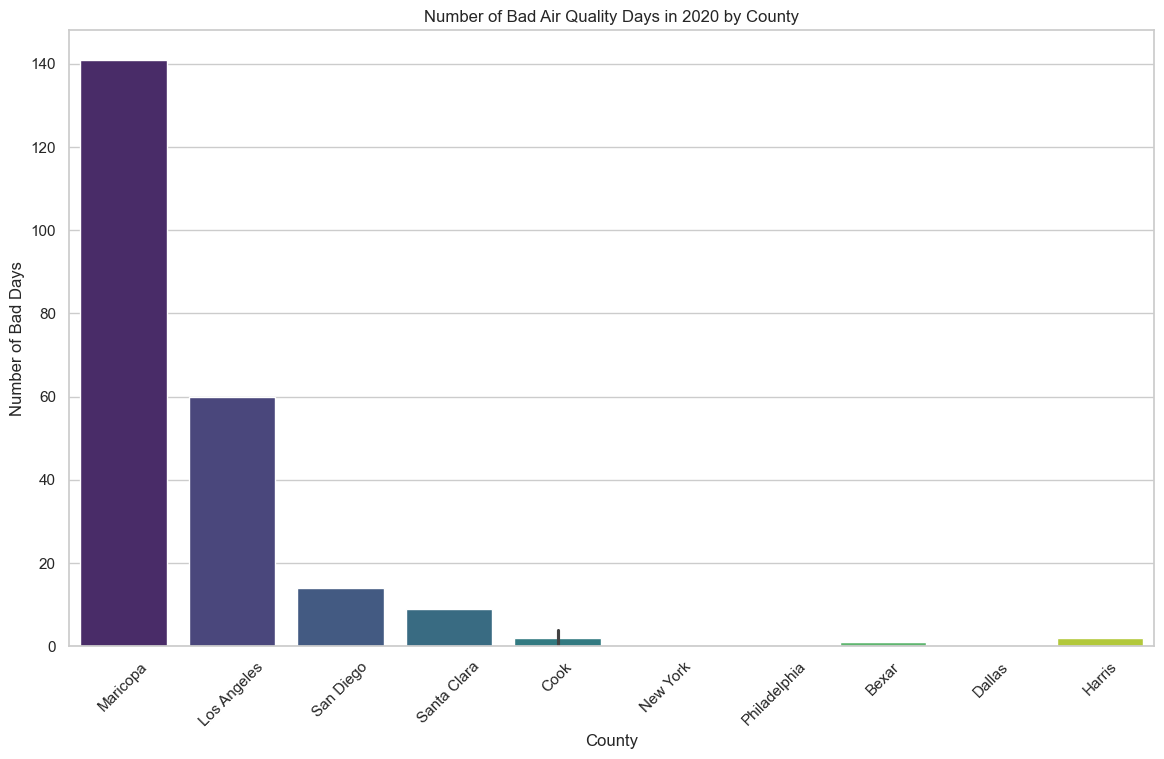

In [27]:
# Calculate the total number of bad air quality days
filtered_aqi_df['Bad Days'] = filtered_aqi_df['Unhealthy Days'] + filtered_aqi_df['Very Unhealthy Days'] + filtered_aqi_df['Hazardous Days']

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for the number of bad days in each county
sns.barplot(x='County', y='Bad Days', data=filtered_aqi_df, palette='viridis')

# Set the title and labels
plt.title('Number of Bad Air Quality Days in 2020 by County')
plt.xlabel('County')
plt.ylabel('Number of Bad Days')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Cook County, IL (chicago)
# Harris County, TX (houston)
# New York County, NY (new york)
# Los Angeles County, CA (los angeles)
# Philadelphia County, PA (philadelphia)
# Maricopa County, AZ (phoenix)
# Bexar County, TX (san antonio)
# Dallas County, TX (dallas)
# San Diego County, CA (san diego)
# Santa Clara County, CA (san jose)
